# Cats and Dogs
-[Rishit Dagli](rishitdagli.ml)

## About Me

[Twitter](https://twitter.com/rishit_dagli)

[GitHub](https://github.com/Rishit-dagli)

[Medium](https://medium.com/@rishit.dagli)

## Import some libraries

In [1]:
import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta

## Lets tell the computer about the location of Data

To save manually typing all the paths I made a `base_dir` and for paths I append to it, if you did not understand few lines of code please see this directory structure (made with the code in below cell)-

cats_and_dogs_filtered:

<pre>
---> train<br>
       ---> cats<br>
           ---> cat1.jpg<br>
           ---> cat2.jpg<br>
           ---> cat3.jpg<br>
           .<br>
           .<br>
           .<br>
        ---> dogs<br>
           ---> dog1.jpg<br>
           ---> dog2.jpg<br>
           ---> dog3.jpg<br>
           .<br>
           .<br>
           .<br>
---> test<br>
      ---> cats<br>
           ---> cat1.jpg<br>
           ---> cat2.jpg<br>
           ---> cat3.jpg<br>
           .<br>
           .<br>
           .<br>
        ---> dogs<br>
           ---> dog1.jpg<br>
           ---> dog2.jpg<br>
           ---> dog3.jpg<br>
           .<br>
           .<br>
           .<br>
</pre>           

In [ ]:
```
import os
def list_files(cats_and_dogs_filtered):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))
```

So, now we specify the train and test directories

In [2]:
dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(dir, 'train')
validation_dir = os.path.join(dir, 'validation')

Once, we have train and test directories, let's get the train and test

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Load the data

### Augment the data

We will now be using the `ImageDataGenerator` to augment our images. This all is done in runtime which means you do not waste any disk space

Augmentation simply skew, rotates it, changes it height and everything more you can see down. This helps us to reduce overfitting drastically. We will see that later. Please check the comments for more info and linewise explanation

In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255, #Rescale the image
      rotation_range=40, #Rotate it
      width_shift_range=0.2, #Change the width
      height_shift_range=0.2, #Change the height
      shear_range=0.2, #Shear the image
      zoom_range=0.2, #Zoom in or zoom out
      horizontal_flip=True, #Flip the image horizontally
      fill_mode='nearest')

Don't augment the validation images!!

In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Load the data from directory

We can now easily load images into the runtime from the directories, TensorFlow will automatically label them for you

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


## Model

We have used some `Dropout` layers to reduce overfitting

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

`binary_crossentropy` because we want to do binary classification

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Let's finally fit the model, Note this step can take quite some time

In [40]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6926 - acc: 0.5165 - val_loss: 0.6860 - val_acc: 0.5780
Epoch 2/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6840 - acc: 0.5560 - val_loss: 0.6867 - val_acc: 0.5200
Epoch 3/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6777 - acc: 0.5650 - val_loss: 0.6521 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6676 - acc: 0.5910 - val_loss: 0.6361 - val_acc: 0.6350
Epoch 5/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6530 - acc: 0.6085 - val_loss: 0.6131 - val_acc: 0.6710
Epoch 6/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6393 - acc: 0.6285 - val_loss: 0.5889 - val_acc: 0.6840
Epoch 7/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6187 - acc:

In [44]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 128)      

## Some plots

Let's create an accuracy and loss plot

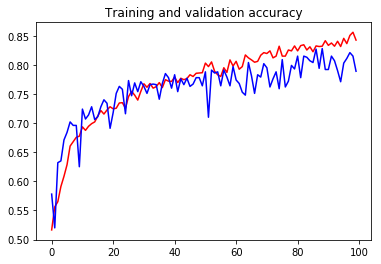

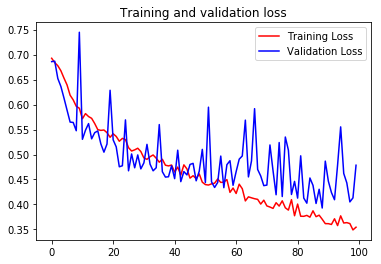

In [45]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Conclusion

We did pretty well and got a decent accuracy of above 85 %, that's not bad considering we made use of so less training time. We can use a pretrained model and make some changes to it. This further pushes the bar and we receive a wonderful 95 %  accuracy. These models which we use have been trained for days on data and have more than 100 layers! That defines why they have so good accuracy. So, we did a pretty good job.

We also did not overfit the data which can clearly be seen in our plots.

Please head on to my notebook for Transfer Learning which applies what I discussed above here- `Transfer Learning approaach/ TL solution.ipynb`